# Thumbtack Analytics take-home Assignment
#### Deepa Goyal 11/22/2016

In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

### Import csv to dataframe

In [81]:
quotes = pd.read_csv('../data/quotes.csv', parse_dates=True)
visitors = pd.read_csv('../data/visitors.csv', parse_dates=True)
print quotes.shape
print visitors.shape

(64330, 5)
(59996, 8)


### Let's take a look at these datasets

In [82]:
quotes.head()

,request_id,quote_id,quote_price,hired,pro_id
0,1,38912310,NaN,0,851539
1,1,38912311,210.0,0,10113954
2,1,38913628,NaN,0,13498826
3,1,38914071,NaN,0,15921289
4,1,38912344,NaN,0,14506387


In [83]:
visitors.head()

,session_date,device,category_name,sent_request,request_id,how_far,num_bedrooms,num_bathrooms
0,8/1/16,desktop,House Cleaning (One Time),1,9067.0,NaN,1 bedroom,1 bathroom
1,8/1/16,desktop,Local Moving (under 50 miles),1,12707.0,Less than 5 miles,NaN,NaN
2,8/1/16,desktop,Local Moving (under 50 miles),1,19561.0,Less than 5 miles,NaN,NaN
3,8/1/16,mobile,Local Moving (under 50 miles),1,31010.0,Less than 5 miles,NaN,NaN
4,8/1/16,mobile,Local Moving (under 50 miles),1,6887.0,11 - 20 miles,NaN,NaN


In [84]:
visitors['session_date'] = pd.to_datetime(visitors['session_date'])
visitors['day_of_week'] = visitors['session_date'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

visitors['day_of_week'] = visitors['day_of_week'].apply(lambda x: days[x])

In [85]:
visitors.request_id.head()

0     9067.0
1    12707.0
2    19561.0
3    31010.0
4     6887.0
Name: request_id, dtype: float64

In [86]:
#visitors.request_id = visitors.request_id.isnull().astype(int)

In [87]:
visitor_quotes = pd.merge(visitors, quotes, how='left', on='request_id')

In [88]:
#rid = 1.0
#quotes[quotes.request_id==rid]

In [89]:
#visitors[visitors.request_id==rid]

In [90]:
#visitor_quotes[visitor_quotes.request_id==rid]

### 1. Visitors and Conversion rate
#### 1a. How does the number of users change over time? 

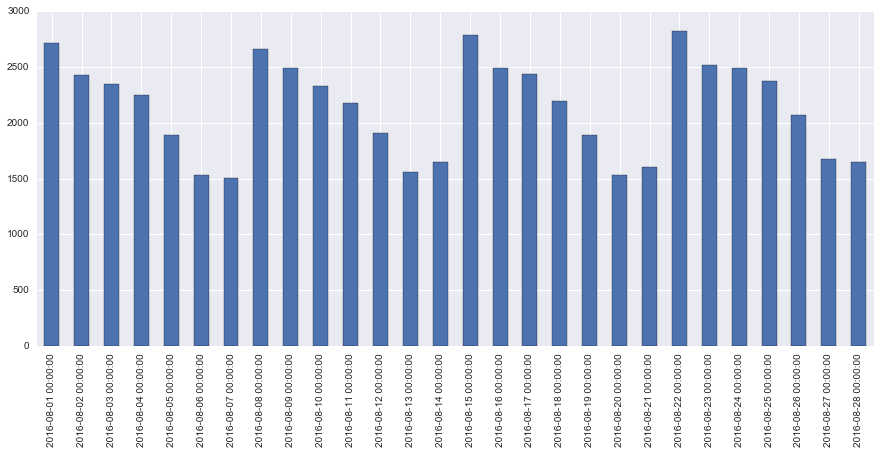

In [91]:
visitors.session_date.value_counts().sort_index().plot(kind='bar', figsize = (15,6))

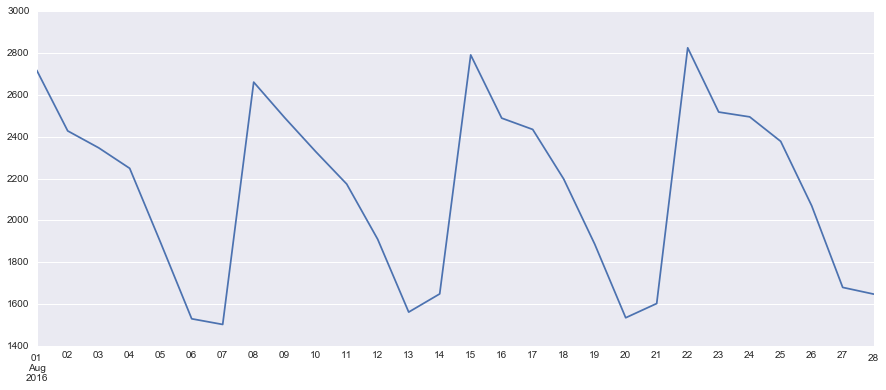

In [92]:
visitors.session_date.value_counts().sort_index().plot(kind='line', figsize = (15,6))

##### Observations
1. We have data for all dates starting 08/01/2016 to 08/28/2016 with no dates missing.
2. Exactly 4 weeks of data
3. There seems to be a 7 day repeating pattern with number of visitors spiking on day 1.
4. Since 08/01/2016 was a monday, we can interpret the spikes on mondays while weekends being fairly low.
5. The monday peaks show a slight rise week over week

#### 1b. What percent of users submit a project request?

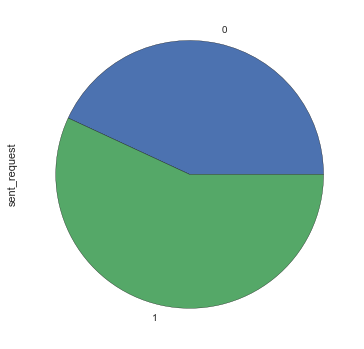

In [93]:
visitors.sent_request.value_counts().sort_index().plot(kind='pie', figsize = (6,6))

In [94]:
from __future__ import division
#Users with sent request = 1
print visitors[visitors.sent_request==1].shape[0]
#All Users
print visitors.shape[0]
#Users who sent request as a percent of total users
print 'Result : Between '+str(visitors.session_date.min())+' and '+str(visitors.session_date.max())+ ', ' + str(100* visitors[visitors.sent_request==1].shape[0] / visitors.shape[0]) + '% of users submitted project requests.'

34146
59996
Result : Between 2016-08-01 00:00:00 and 2016-08-28 00:00:00, 56.913794253% of users submitted project requests.


#### 1c. How do category and device influence these metrics?

In [95]:
pd.DataFrame(visitors.groupby(['device','category_name']).sent_request.value_counts())

0
device  category_name                 sent_request       
desktop House Cleaning (One Time)     1              5297
                                      0              2990
        Local Moving (under 50 miles) 1             13411
                                      0             10597
mobile  House Cleaning (One Time)     1              5669
                                      0              3391
        Local Moving (under 50 miles) 1              9769
                                      0              8872

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1374dce50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13938e810>], dtype=object)

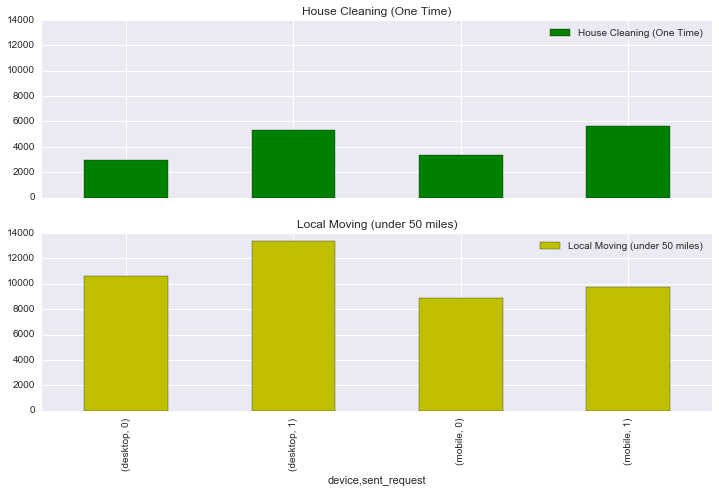

In [96]:
my_colors = 'gy'
visitors.groupby(['category_name','device']).sent_request.value_counts().unstack(0).plot(
                                        kind = 'bar',
                                        subplots=True, 
                                        figsize = (12,7),sharex=True, sharey=True, colors = my_colors)

#### Observations
In current dataset, there are only two categories: Local Moving and House Cleaning

The trend of people looking for House Cleaning, submitting a request doesn't seem to be influence by device. However, the people looking for Local Moving, while generally submitting more requests as a whole, desktop users are submitting more requests than mobile users.

### 2. Quotes per request

#### 2a. What is the distribution of number of quotes per request?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139c43450>]], dtype=object)

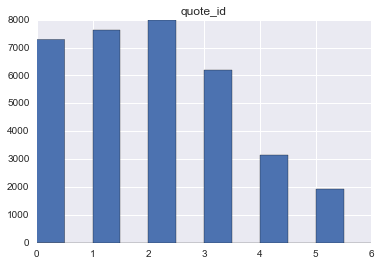

In [97]:
b = pd.DataFrame(visitor_quotes.groupby('request_id').quote_id.count())
b.hist(bins=12)

A majority of people received 1 or 2 quotes. Closely followed by people who either received 3 or no quotes.
There is only 1 individual who received 6 quotes.

#### 2b. What factors contribute to some requests getting more quotes than others?

In [98]:
visitor_quotes['project'] = visitor_quotes.fillna('')['num_bedrooms'] + visitor_quotes.fillna('')['num_bathrooms']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x137c69c10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x137b43ed0>], dtype=object)

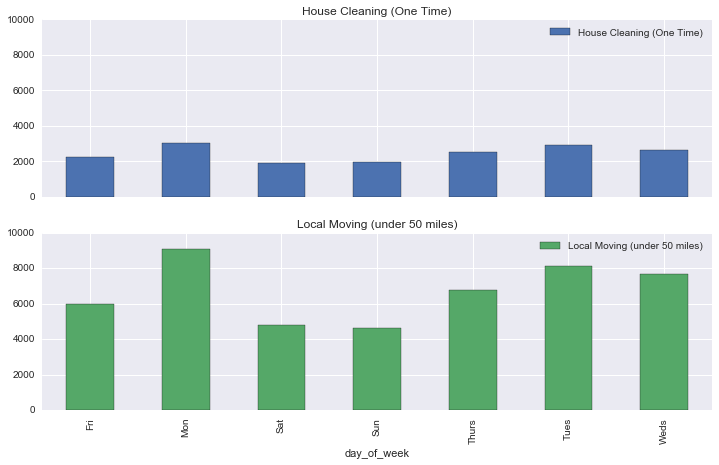

In [99]:
visitor_quotes.groupby(['category_name', 'day_of_week']).quote_id.count().unstack(0).plot(
                                        kind = 'bar',
                                        subplots=True, 
                                        figsize = (12,7),sharex=True, sharey=True)

Monday, Tuesday and Wednesdays seem to be the top three days when most quotes are generated.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x137b08d90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x139751410>], dtype=object)

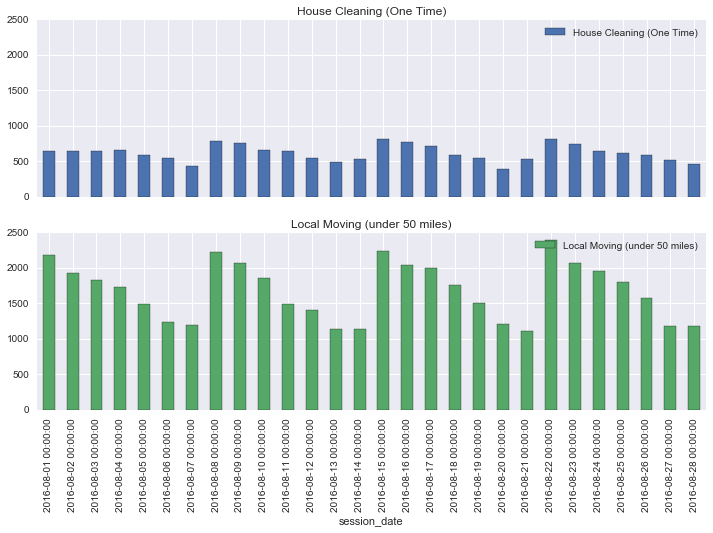

In [100]:
visitor_quotes.groupby(['category_name', 'session_date']).quote_id.count().unstack(0).plot(
                                        kind = 'bar',
                                        subplots=True, 
                                        figsize = (12,7),sharex=True, sharey=True)

Local moving category attracts consistently more quotes than house cleaning category.

### 3. Job Value
#### 3a. By category, what is the distribution of quote prices for a project?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13ae8d890>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13c7cd4d0>], dtype=object)

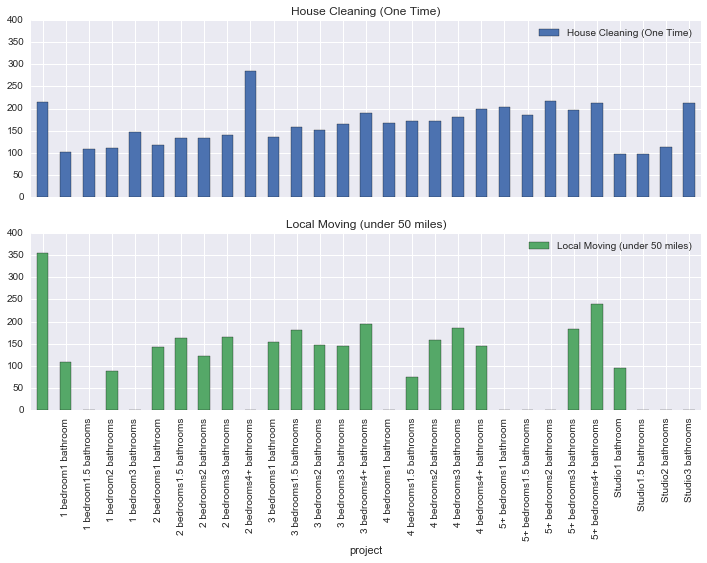

In [101]:
visitor_quotes.groupby(['category_name', 'project']).quote_price.mean().unstack(0).plot(
                                        kind = 'bar',
                                        subplots=True, 
                                        figsize = (12,7),sharex=True, sharey=True)

#### 3b. By category, what prices do you think Thumbtack should charge pros to quote? Why?

Thumbtack offers credits to professionals to offer quotes which are across all categories. There is, however, a higher number of local moving requests than house cleaning requests while house cleaning's average quote price is lower. Thumbtack could incentivize cleaning professionals to place more quotes by charging fewer credits per quote for a house cleaning project. Since we see more frequent Local moving requests, and that being a unique space, it would make sense to charge standard \$1.5 per credit price or even increase to  \$2 per quote.

### 4. Further Exploration
#### 4a. Briefly describe two other questions or analysis you would be interested in pursuing if you had more time to explore this data?

Q. What are the factors that result in a requests materializing into hiring of the professionals?

Q. Do requests that have more details provided such as distance, number of bedrooms improve the number of quotes received in comparisons to users who leave these blank?